## Rent Price in Barcelona 2014-2022

About Dataset
This dataset includes data on price for rent in Barcelona, Spain. The data was collected for a period of 2014 - 2022 years, divided into trimesters.
The prices go by neighbourhoods and districts.
This dataset includes both prices per month and prices per square meter, so that you can easier compare them. 
Data Source : https://www.kaggle.com/datasets/marshuu/rent-price-in-barcelona-2014-2022

# Import Libraries

In [ ]:
!pip install  category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 7.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import median_absolute_error

# Load Data

In [ ]:
df = pd.read_csv("/content/Barcelona_rent_price.csv")
print("df shape:", df.shape)
df.head()

df shape: (4622, 6)


,Year,Trimester,District,Neighbourhood,Average _rent,Price
0,2014,1,Ciutat Vella,el Raval,average rent (euro/month),589.55
1,2014,1,Ciutat Vella,Gothic Quarter,average rent (euro/month),712.79
2,2014,1,Ciutat Vella,la Barceloneta,average rent (euro/month),540.71
3,2014,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",average rent (euro/month),673.44
4,2014,1,Eixample,Fort Pienc,average rent (euro/month),736.09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           4622 non-null   int64  
 1   Trimester      4622 non-null   int64  
 2   District       4622 non-null   object 
 3   Neighbourhood  4622 non-null   object 
 4   Average _rent  4622 non-null   object 
 5   Price          4622 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 216.8+ KB


# Explore Data - EDA

In [ ]:
df["District"].value_counts()

Nou Barris             714
Horta-Guinardo         682
Sant Marti             680
Sants-Montjuic         486
Sant Andreu            428
Eixample               408
Sarria-Sant Gervasi    408
Gracia                 340
Ciutat Vella           272
Les Corts              204
Name: District, dtype: int64

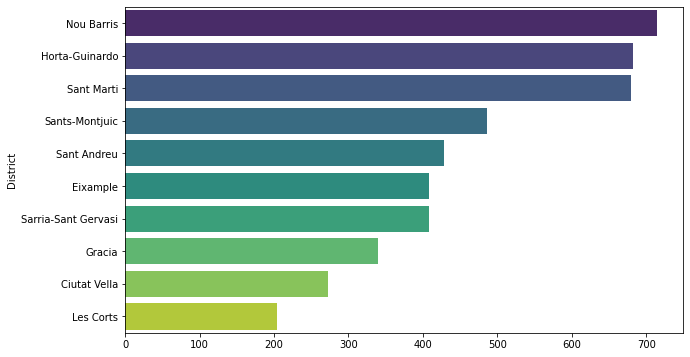

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=df["District"].value_counts(), y=df["District"].value_counts().index,palette="viridis", orientation = "horizontal")
plt.ylabel("District"),
plt.xlabel("");

In [ ]:
df["Trimester"].value_counts()

2    1230
1    1222
4    1088
3    1082
Name: Trimester, dtype: int64

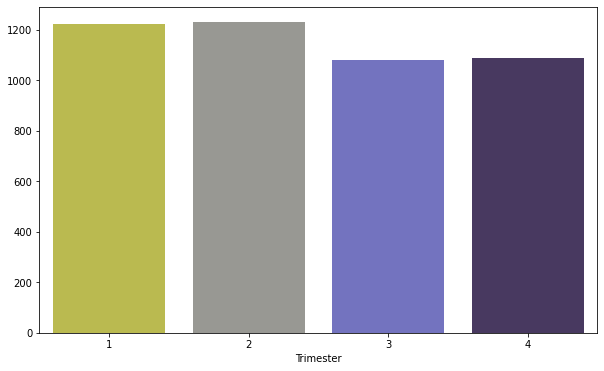

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=df["Trimester"].value_counts().index, y=df["Trimester"].value_counts(),palette="gist_stern_r")
plt.xlabel("Trimester"),
plt.ylabel("");

In [ ]:
df["Neighbourhood"].value_counts()

el Raval                      68
Ciutat Meridiana              68
el Carmel                     68
la Teixonera                  68
Gothic Quarter                68
                              ..
Sant Martíide Provencals      16
Can Peguera                   10
la Marina del Prat Vermell    10
Vallbona                       6
la Clota                       2
Name: Neighbourhood, Length: 75, dtype: int64

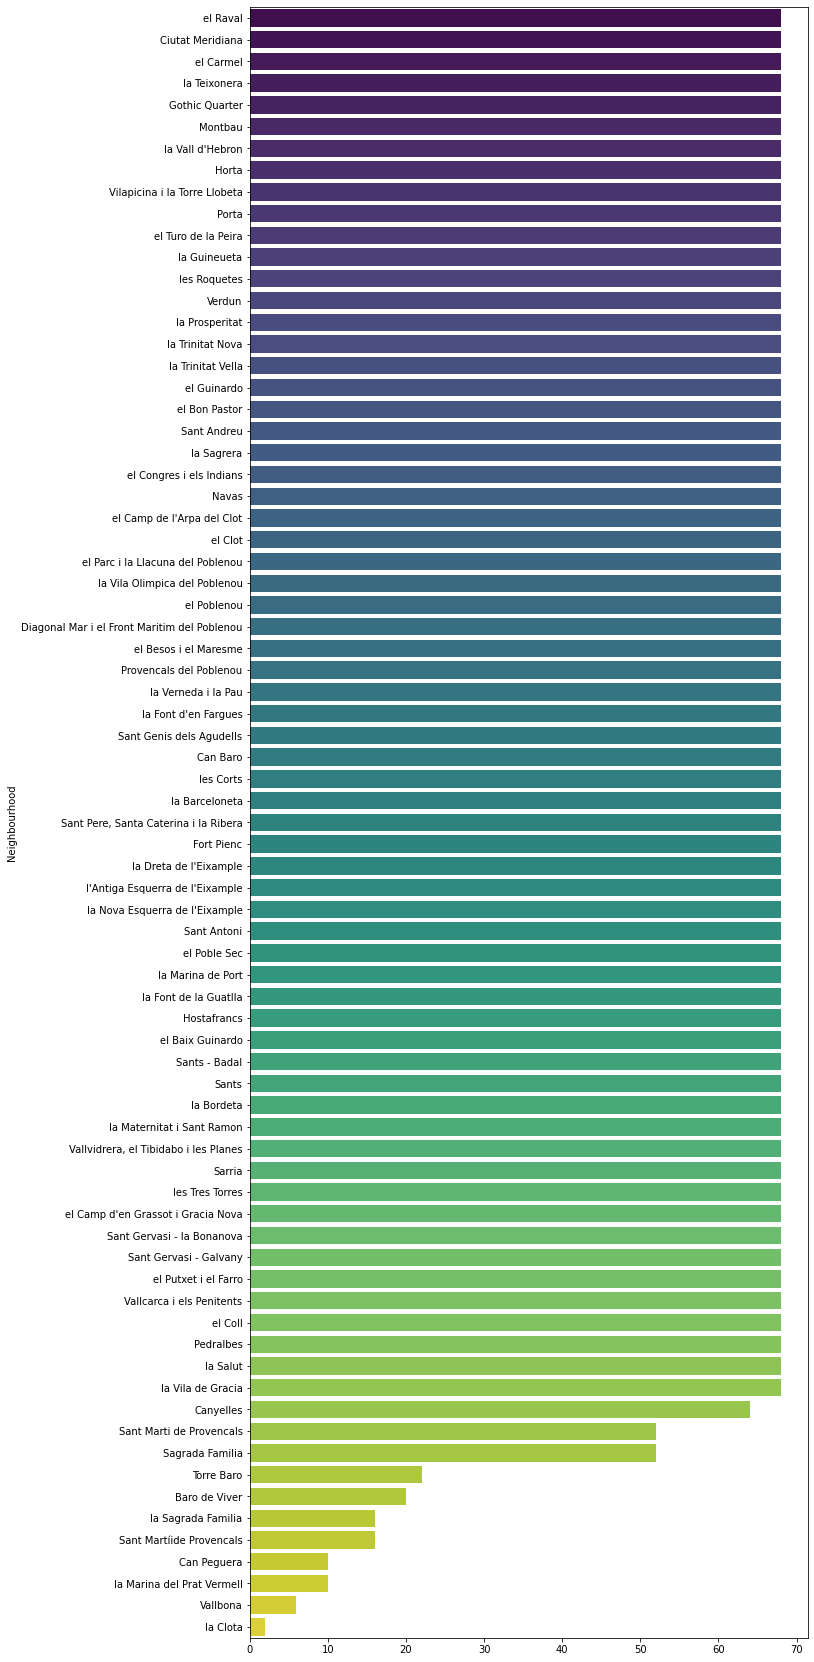

In [ ]:
fig, ax = plt.subplots(figsize=(10, 30))
sns.barplot(x=df["Neighbourhood"].value_counts(), y=df["Neighbourhood"].value_counts().index,palette="viridis", orientation = "horizontal")
plt.ylabel("Neighbourhood"),
plt.xlabel("");

In [ ]:
df["Average _rent"].value_counts()

average rent (euro/month)             2311
average rent per surface (euro/m2)    2311
Name: Average _rent, dtype: int64

Create a Mapbox scatter plot that shows the location of the apartments in your dataset and represent their price using color.

In [ ]:
# Plot Mapbox location and price
fig= px.scatter_mapbox(
    df,
    lat = "District",
    lon = "Neighbourhood",
    center={"lat":19.43, "lon":-99.13},
    width=600,
    height=600,
    hover_data=["Price"],
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

Multicollinearity

Correlation is the relationship between features while Multicollinearity occurs when features in our feature matrix that are highly correlated with eachother. A good way to detect this is to use a heatmap.

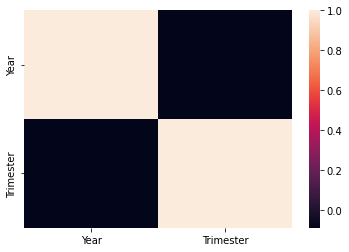

In [ ]:
corr = df.select_dtypes("number").drop(columns = "Price").corr()
sns.heatmap(corr);

In [ ]:
df.corr()

,Year,Trimester,Price
Year,1.000000,-0.088623,0.098240
Trimester,-0.088623,1.000000,0.010525
Price,0.098240,0.010525,1.000000


# Split

A key part in any model-building project is separating your target (the thing you want to predict) from your features (the information your model will use to make its predictions). In these project our target is the price while our features will be Year, Trimester,District,Neighbourhood and Average rent.

In [ ]:
#Create the feature matrix named X, which will be use to train your model.
features = ["Year","Trimester","District","Neighbourhood", "Average _rent"]
X = df[features]
X.shape

(4622, 5)

In [ ]:
# Check work
assert X.shape == (
    4622,
    5,
), f"The shape of `X_train` should be (1343, 1), not {X_train.shape}."

In [ ]:
#Create the target vector named y, which will be use to train your model
target = "Price"
y = df[target]
y.shape

(4622,)

In [ ]:
# Check work
assert y.shape == (4622,)

Divide data (X and y) into training and test sets using a randomized train-test split.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3235, 5)
y_train shape: (3235,)
X_test shape: (1387, 5)
y_test shape: (1387,)


# Build Model

The first step in building a model is baselining, one way to think about this is to see how a "dumb" model would perform on the same data. let's start by figuring out what our baseline model's prediction should be.

In [ ]:
#Calculate the mean of the target vector "y" and assign it to the variable y_mean.
y_mean = y.mean()
y_mean

416.4575941151017

In [ ]:
#Create a list named y_pred_baseline that contains the value of y_mean.
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[416.4575941151017,
 416.4575941151017,
 416.4575941151017,
 416.4575941151017,
 416.4575941151017]

In [ ]:
#Calculate the baseline mean absolute error for predictions in y_pred_baseline as compared to the true targets in y
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean Rent price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Rent price 416.46
Baseline MAE: 404.67


What does this information tell us? It tells us that our model needs to have mean absolute error below 405.46 in order to be useful.

In [ ]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Acccuracy:", round (acc_baseline, 2))

Baseline Acccuracy: 0.01


# Iterate

The next step in building a model is iterating. This involves building a model, training it, evaluating it, and then repeating the process until you're happy with the model's performance.

Create a pipeline named model that contains all the transformers necessary for this dataset and one of the predictors you've used during this project. Then fit your model to the training data.

In [ ]:
ohe = OneHotEncoder(use_cat_names=True)
#Fit
ohe.fit(X_train)
#Transform
XT_train = ohe.transform(X_train)
print(XT_train.shape)
XT_train.head()

(4622, 89)


,Year,Trimester,District_Ciutat Vella,District_Eixample,District_Sants-Montjuic,District_Les Corts,District_Sarria-Sant Gervasi,District_Gracia,District_Horta-Guinardo,District_Nou Barris,...,Neighbourhood_la Verneda i la Pau,Neighbourhood_Torre Baro,Neighbourhood_Baro de Viver,Neighbourhood_la Marina del Prat Vermell,Neighbourhood_Vallbona,Neighbourhood_la Clota,Neighbourhood_la Sagrada Familia,Neighbourhood_Sant Martíide Provencals,Average _rent_average rent (euro/month),Average _rent_average rent per surface (euro/m2)
0,2014,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2014,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2014,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2014,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2014,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Build Model
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    LinearRegression()
)
#Fit model
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['District', 'Neighbourhood',
                                     'Average _rent'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])